<a href="https://colab.research.google.com/github/ayoni02/circle-14-project/blob/main/Chicago_Crime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In case your're using Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## EDA on Chicagop Crime Dataset.
### This is mostly going to focus on Areas and locations instead of Time

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# get the dataset

df = pd.read_csv("/content/drive/MyDrive/Yoti/Copy of crime_data_chicago.csv")

In [ ]:
df.shape

(2278726, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [ ]:
df.ID.nunique()

2278726

In [ ]:
df['Case Number'].nunique()

2278678

In [ ]:
df['Unnamed: 0'].nunique()

2278726

In [ ]:
df[['Unnamed: 0', 'ID', 'Case Number']].head(2)

,Unnamed: 0,ID,Case Number
0,0,6407111,HP485721
1,1,11398199,JB372830


In [3]:
# Since all 3 columns are unqiue and are identifiers, we can drop 2 of them
df = df.drop(['Unnamed: 0', 'ID'], axis = 1)

In [4]:
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [5]:
# We can get infomations on the numerical columns
df.describe()

,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


<ipython-input-6-a5bd57f73938>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

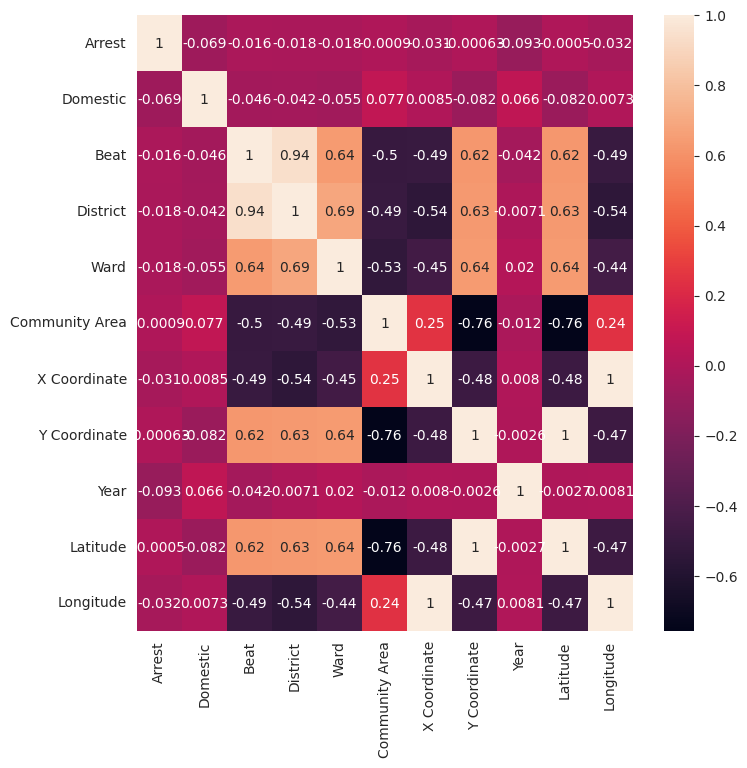

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Since the cordinate are perfectly complimentng each other, I'll drop one of them
df = df.drop(['X Coordinate', 'Y Coordinate'], axis = 1)

In [9]:
# Beat and district are also complimenting each other but not perfectly this time
df.corr().Beat.sort_values()

<ipython-input-9-b774d9ffc70d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Beat.sort_values()


Community Area   -0.500336
Longitude        -0.490375
Domestic         -0.045669
Year             -0.041529
Arrest           -0.015512
Latitude          0.624454
Ward              0.641348
District          0.944865
Beat              1.000000
Name: Beat, dtype: float64

In [11]:
# Here we can see that a beat is first made up of the district numbers
df[["Beat","District"]].tail(2)

,Beat,District
2278724,1831,18.0
2278725,1434,14.0


In [15]:
df.District.nunique()

23

In [20]:
df.District.unique()

array([ 4., 17., 11., 12.,  2., 15., 25., 14.,  8.,  6., 19.,  1.,  7.,
       20., 18.,  3.,  9., 22.,  5., 16., 10., 24., 31., nan])

In [24]:
df.isna().sum()

Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [5]:
# We can write a function to fill it up
def fill_district(cols):
  beat = cols[0]
  district = cols[1]

  if pd.isnull(district):
    return int(str(beat)[:-2])
  else:
    return int(district)

In [9]:
df["District"] = df[["Beat", "District"]].apply(fill_district, axis=1)

In [10]:
df.District.unique()

array([ 4, 17, 11, 12,  2, 15, 25, 14,  8,  6, 19,  1,  7, 20, 18,  3,  9,
       22,  5, 16, 10, 24, 31,  0])

<Axes: xlabel='District', ylabel='count'>

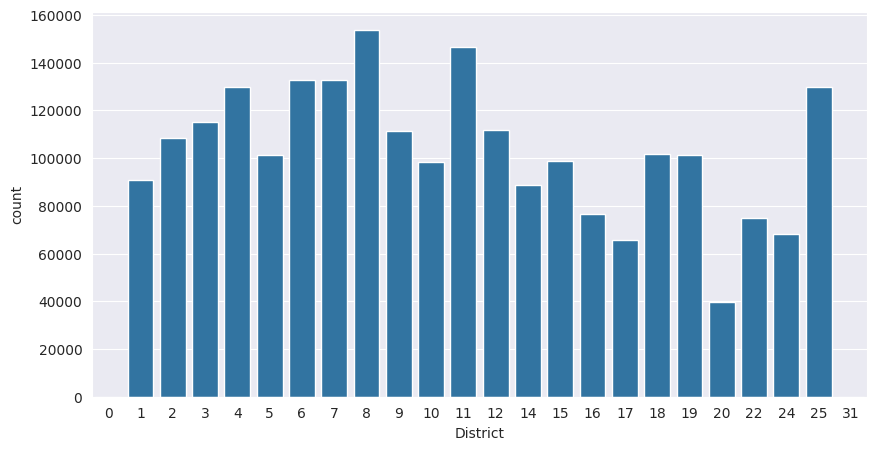

In [11]:
# Now we can Check the district with the highest amount of crimes. There, we can see district 8 has more reports
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="District")

In [62]:
df.columns

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [66]:
df.Location.nunique()

545376

In [30]:
# Since i don't need the locations for the EDA, I'm dropping them
df = df.drop(["Location", "Longitude", "Latitude"], axis=1)

In [73]:
df["Location Description"].unique()[:10]

array(['STREET', 'POOL ROOM', 'RESIDENCE', 'NURSING HOME/RETIREMENT HOME',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'CTA PLATFORM', 'ALLEY',
       'POLICE FACILITY/VEH PARKING LOT', 'SIDEWALK', 'APARTMENT'],
      dtype=object)

In [14]:
# Making a simple location description
def locate(col):
  return col.split()[0]

In [15]:
# Since the location description column has nan values, i have to convert it all to string first
df["Location Description"] = df["Location Description"].astype(str)

In [16]:
df["Simple Location"] = df["Location Description"].apply(locate)

<Axes: >

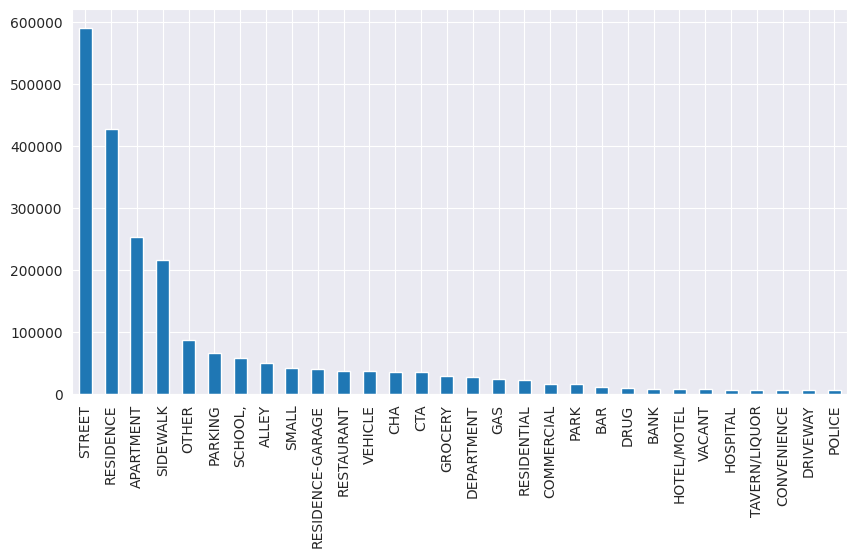

In [107]:
# Now we can check which location Types are more rampant in crimes, Here we can see crimes happen more on streets
# followed by houses
plt.figure(figsize=(10, 5))
df["Simple Location"].value_counts()[0:30].plot(kind="bar")

In [17]:
# We can also get the crimes handled by each Police department
df["Case"] = df["Case Number"].apply(lambda x: str(x)[:2])

In [19]:
df = df[df["Case"] != 'na'] # This is just to drop the null collumn

<Axes: >

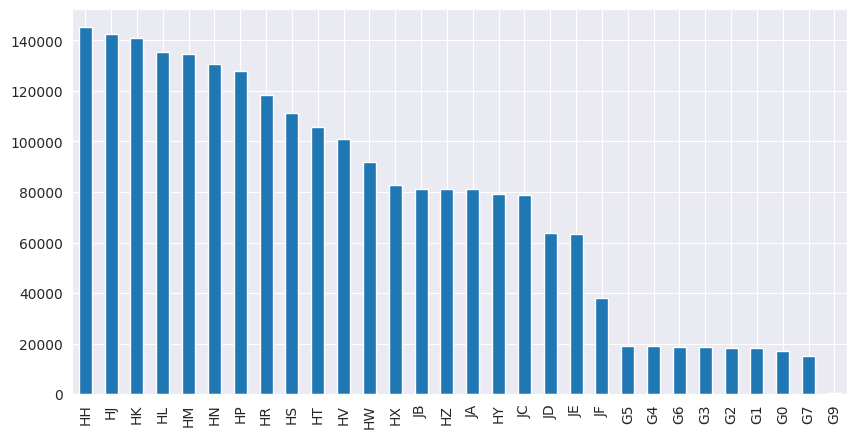

In [20]:
# There are 77 departments, To chewck whichy departments has to deal with the most crimes
plt.figure(figsize=(10, 5))
df["Case"].value_counts()[0:30].plot(kind="bar")

<Axes: >

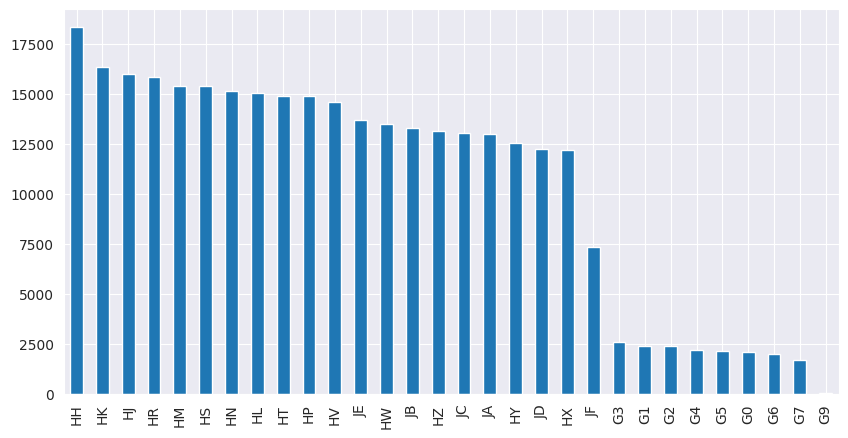

In [26]:
# And to check when it is domestic related
plt.figure(figsize=(10, 5))
df[df["Domestic"] == True]["Case"].value_counts()[0:30].plot(kind="bar")

<Axes: >

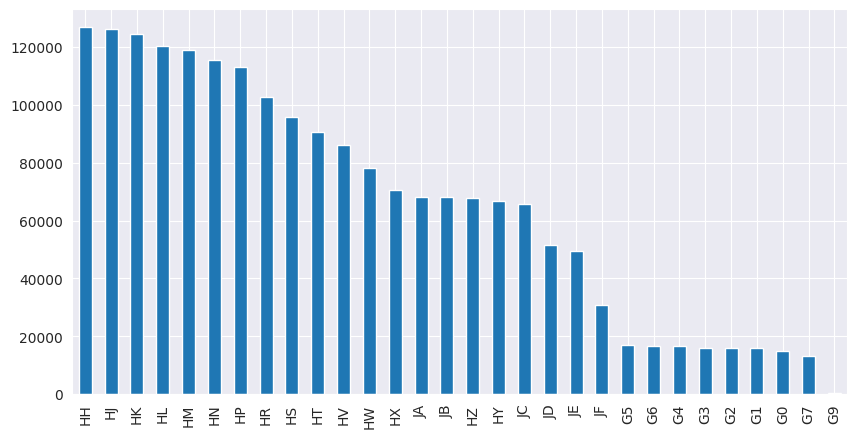

In [27]:
plt.figure(figsize=(10, 5))
df[df["Domestic"] == False]["Case"].value_counts()[0:30].plot(kind="bar")

<Axes: xlabel='Domestic', ylabel='count'>

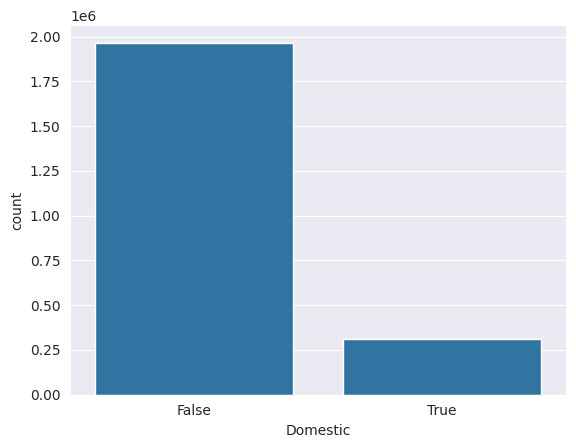

In [12]:
# We can also check the skew of Domestic cases, And we can see we have less domestic crimes
sns.countplot(data= df, x="Domestic")

<Axes: xlabel='count', ylabel='Primary Type'>

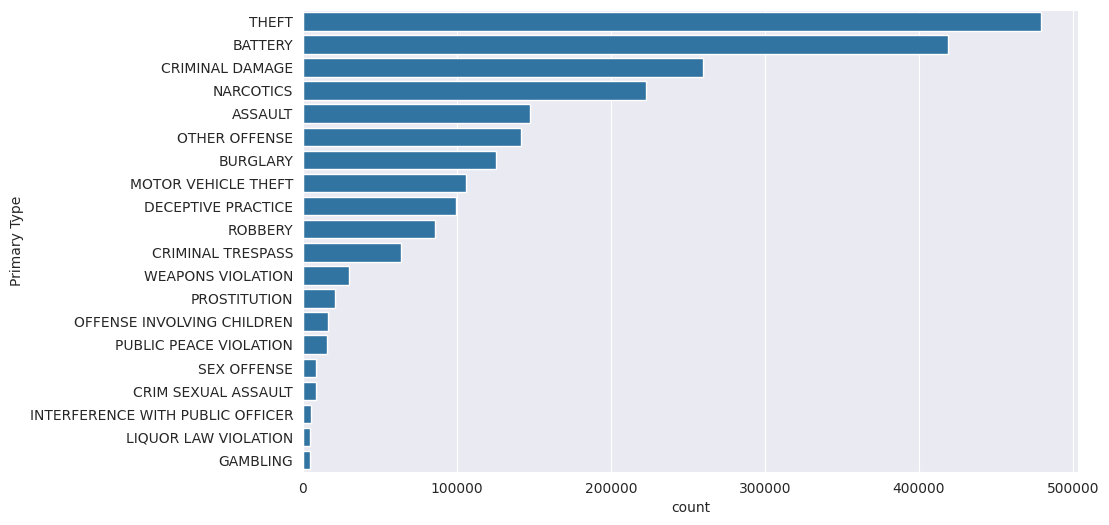

In [44]:
# We can check the top types of crimes being commited
top_types = df['Primary Type'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Primary Type'].isin(top_types.index)], y='Primary Type', order=top_types.index)

<Axes: xlabel='count', ylabel='Block'>

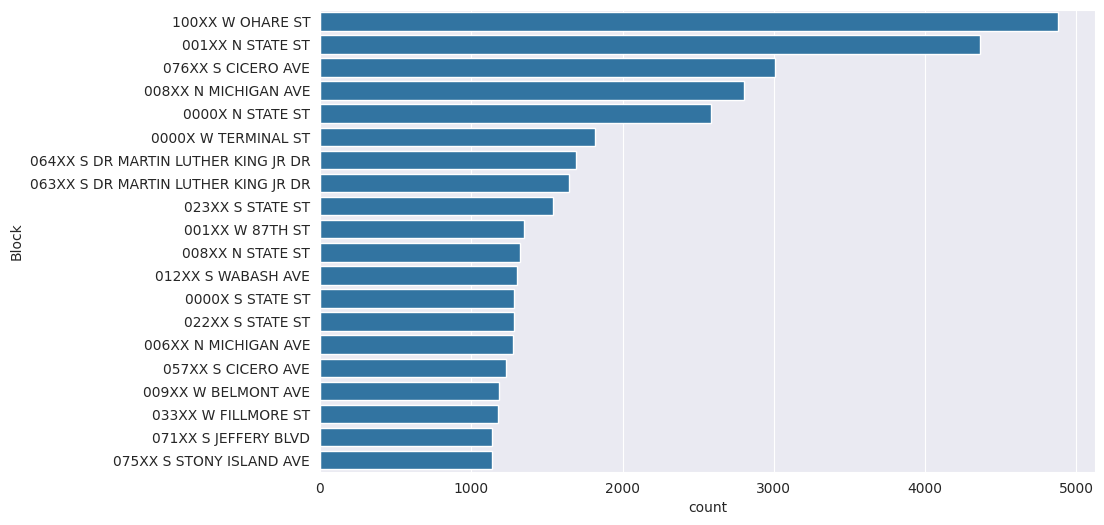

In [46]:
# We can also chweck the areas that have the most crimes
top_block = df['Block'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Block'].isin(top_block.index)], y='Block', order=top_block.index)

<Axes: xlabel='Arrest', ylabel='count'>

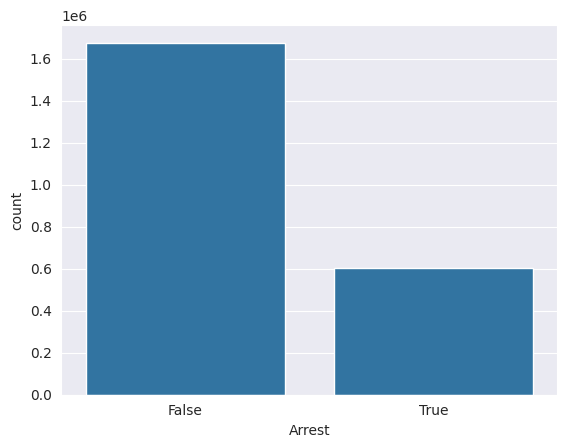

In [47]:
# Lastly, we can check how skewed the amount of arrests made since the start of the dataset

sns.countplot(data=df, x="Arrest")

# We can see through this EDA the laces where crimes are much likely to be committed according to the police department, the area and the wether or not it is a domestic affair. Lastly, we check how many of the crimes reported lead to an arrest

## Thanks